# Overview

Client provided credit card transaction history for prior 2 years. Wanted to examine potential savings with other reward cards based on the category of transactions as well specific merchants(ex- Amazon)

# Import Data/General Analysis

In [1]:
import pandas as pd

history = pd.read_csv('C:/History.csv')

In [2]:
print(history.head())

  Transaction Date   Post Date           Description           Category  Type  \
0       02/25/2022  02/27/2022     SUNOCO 0520206402                Gas  Sale   
1       02/26/2022  02/27/2022         TST* DECO BAR       Food & Drink  Sale   
2       02/25/2022  02/27/2022  TST* PIZZERIA BARDEA       Food & Drink  Sale   
3       02/25/2022  02/27/2022      WALGREENS #11080  Health & Wellness  Sale   
4       02/21/2022  02/22/2022      WALGREENS #11080  Health & Wellness  Sale   

   Amount  Memo  
0   -8.29   NaN  
1  -28.00   NaN  
2  -32.00   NaN  
3  -18.98   NaN  
4  -52.98   NaN  


In [3]:
print(history.describe())

             Amount  Memo
count    758.000000   0.0
mean      -0.263628   NaN
std      691.937296   NaN
min   -10822.000000   NaN
25%      -50.045000   NaN
50%      -20.165000   NaN
75%       -9.990000   NaN
max    10822.000000   NaN


In [4]:
history.dtypes

Transaction Date     object
Post Date            object
Description          object
Category             object
Type                 object
Amount              float64
Memo                float64
dtype: object

In [5]:
# convert transaction date and post date to actual dates
history['Transaction Date'] = pd.to_datetime(history['Transaction Date'],  format = '%m/%d/%Y')
history['Post Date'] = pd.to_datetime(history['Post Date'],  format = '%m/%d/%Y')

In [6]:
# show transaction by year and month
history['Transaction Date'].groupby([history['Transaction Date'].dt.year, history['Transaction Date'].dt.month]).agg('count')


Transaction Date  Transaction Date
2020              2                    5
                  3                   30
                  4                   23
                  5                   17
                  6                   36
                  7                   41
                  8                   45
                  9                   23
                  10                  21
                  11                  33
                  12                  35
2021              1                   25
                  2                   23
                  3                   49
                  4                   39
                  5                   52
                  6                   34
                  7                   30
                  8                   26
                  9                   26
                  10                  32
                  11                  36
                  12                  43
2022              1   

In [7]:
print(history.shape)

(758, 7)


In [8]:
# show blank columns
print(history.isna().sum())

Transaction Date      0
Post Date             0
Description           0
Category             22
Type                  0
Amount                0
Memo                758
dtype: int64


#so all memos are null..22 instances of null values for category well need to investigate

In [9]:
#review nulls for category

print(history[history['Category'].isna()])

    Transaction Date  Post Date                Description Category     Type  \
19        2022-02-01 2022-02-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
62        2021-12-11 2021-12-12   Payment Thank You-Mobile      NaN  Payment   
104       2021-11-09 2021-11-09   Payment Thank You-Mobile      NaN  Payment   
113       2021-11-01 2021-11-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
144       2021-10-01 2021-10-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
171       2021-09-01 2021-09-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
197       2021-08-01 2021-08-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
228       2021-07-01 2021-07-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
260       2021-06-01 2021-06-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
313       2021-04-30 2021-04-30  AUTOMATIC PAYMENT - THANK      NaN  Payment   
351       2021-04-01 2021-04-01  AUTOMATIC PAYMENT - THANK      NaN  Payment   
400       2021-03-01 2021-03-01  AUTOMAT

In [10]:
#segment payments and drop from history dataframe
payments = history[history['Category'].isna()]
history = history.dropna(subset=['Category']).reset_index()

blank categories are payments..segment these out to a new df

In [11]:
#extract weekday, month, year from trans date

from datetime import datetime
history['weekday'] = history['Transaction Date'].dt.day_name()
history['month_name'] = history['Transaction Date'].dt.strftime('%B')
history['month'] = history['Transaction Date'].dt.month.astype('str')
history['year'] = history['Transaction Date'].dt.year.astype('str')

history['month_year'] = history['month'] + "-" + history['year']

In [12]:
# drop memo since its blank for every row

history = history.drop('Memo', axis=1)

In [13]:
#calculate days between post date and transaction date
#reverse amts so that charges become positive

history['days_to_post'] = history['Post Date'] - history['Transaction Date']
history['charge_amt'] = history['Amount']* -1

In [14]:
#enter monthly total as a column
#enter daily total as a column

history['monthly_total'] = history['charge_amt'].groupby(history['month_year']).transform('sum')
history['daily_total'] = history['charge_amt'].groupby(history['Transaction Date']).transform('sum')

In [15]:
history.shape

(736, 16)

In [16]:
print(history['Description'].value_counts().nlargest(n=15))

THE HOME DEPOT 1601         52
LOWES #02258*               36
DELCASTLE GOLF COURSE       31
VENMO                       26
CHICK-FIL-A #03315          25
HOCKESSIN HARDWARE          22
PIKE CREEK LIBERTY          17
EL DIABLO PIKE CREEK        16
WALGREENS #11080            14
TST* TWIST D TOMATO         10
WALGREENS #11005             8
CVS/PHARMACY #03038          7
WAWA 858      00008581       7
LIMESTONE BARBECUE AND B     6
SHORESTOP 282                6
Name: Description, dtype: int64


In [17]:
history.head()

,index,Transaction Date,Post Date,Description,Category,Type,Amount,weekday,month_name,month,year,month_year,days_to_post,charge_amt,monthly_total,daily_total
0,0,2022-02-25,2022-02-27,SUNOCO 0520206402,Gas,Sale,-8.29,Friday,February,2,2022,2-2022,2 days,8.29,1120.01,59.27
1,1,2022-02-26,2022-02-27,TST* DECO BAR,Food & Drink,Sale,-28.00,Saturday,February,2,2022,2-2022,1 days,28.00,1120.01,28.00
2,2,2022-02-25,2022-02-27,TST* PIZZERIA BARDEA,Food & Drink,Sale,-32.00,Friday,February,2,2022,2-2022,2 days,32.00,1120.01,59.27
3,3,2022-02-25,2022-02-27,WALGREENS #11080,Health & Wellness,Sale,-18.98,Friday,February,2,2022,2-2022,2 days,18.98,1120.01,59.27
4,4,2022-02-21,2022-02-22,WALGREENS #11080,Health & Wellness,Sale,-52.98,Monday,February,2,2022,2-2022,1 days,52.98,1120.01,84.68


# Charts Exploratory

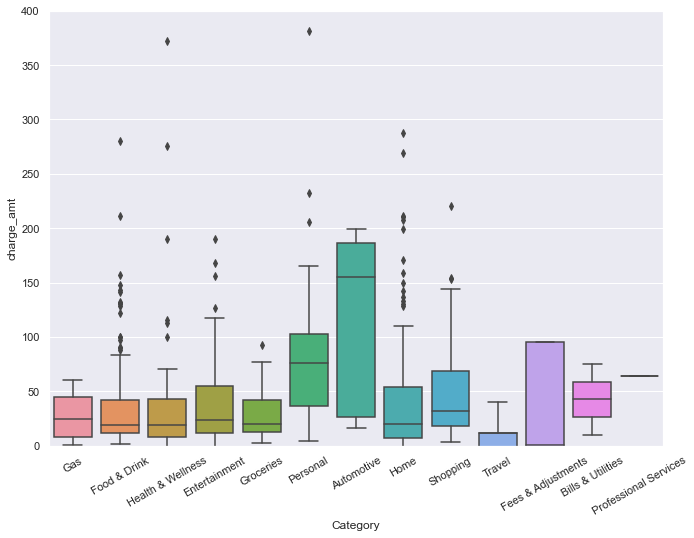

In [18]:
#boxplot scaled dowm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})
ax = sns.boxplot(data=history, y='charge_amt', x='Category')
plt.ylim(0, 400)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

plt.show()



C:\Users\danjl\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


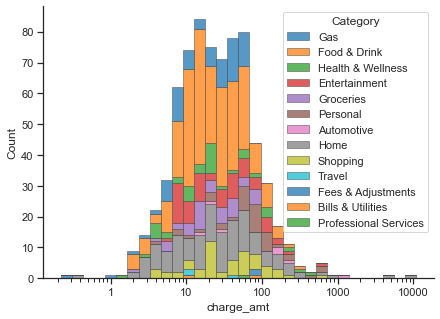

In [19]:
#histogram by charge amt colored by category
sns.set(style="ticks")

import matplotlib as mpl

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    history,
    x="charge_amt", hue="Category",
    multiple="stack",
    palette="tab10",
    edgecolor=".3",
    linewidth=.5,log_scale=True
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


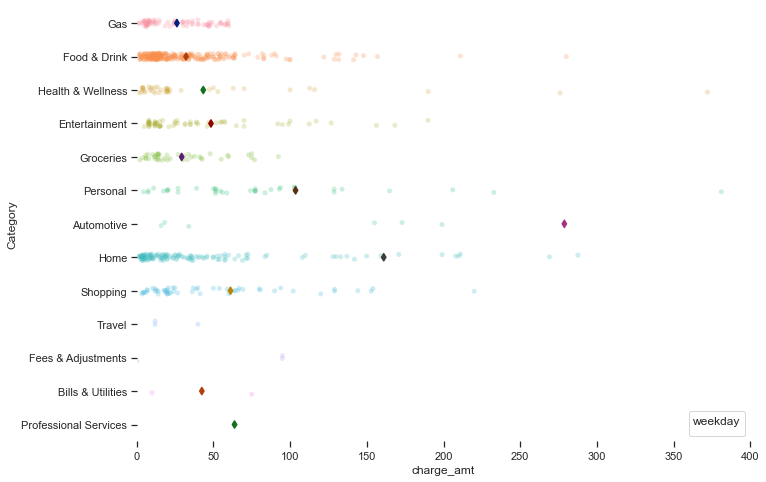

In [20]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="charge_amt", y="Category",
              data=history, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="charge_amt", y="Category",
              data=history, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="weekday",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

plt.xlim(0, 400)
plt.show()

Client uses card for Groceries and Gas, which are 2 potential savings categories that are currently not maximixed with current. Also see alot of purchases at home depot and lowes which both offer credit cards

Client is currently getting 2 percent back on Food&Drink, Entertainment Categories, 1 percent back on everything else. Create a function that calculate the amt in cash back for each charge on current card



In [21]:
#calculate current rewards in a new column

def category_rate(category):
  if category == 'Travel':
    return .03
  elif category == 'Food & Drink':
    return .03
  else:
    return .01

history["Current_Rate"] = history["Category"].apply(lambda Category: category_rate(Category))
history["Cash_Back"] = history["Current_Rate"] * history['charge_amt']

In [22]:
history.head()

,index,Transaction Date,Post Date,Description,Category,Type,Amount,weekday,month_name,month,year,month_year,days_to_post,charge_amt,monthly_total,daily_total,Current_Rate,Cash_Back
0,0,2022-02-25,2022-02-27,SUNOCO 0520206402,Gas,Sale,-8.29,Friday,February,2,2022,2-2022,2 days,8.29,1120.01,59.27,0.01,0.0829
1,1,2022-02-26,2022-02-27,TST* DECO BAR,Food & Drink,Sale,-28.00,Saturday,February,2,2022,2-2022,1 days,28.00,1120.01,28.00,0.03,0.8400
2,2,2022-02-25,2022-02-27,TST* PIZZERIA BARDEA,Food & Drink,Sale,-32.00,Friday,February,2,2022,2-2022,2 days,32.00,1120.01,59.27,0.03,0.9600
3,3,2022-02-25,2022-02-27,WALGREENS #11080,Health & Wellness,Sale,-18.98,Friday,February,2,2022,2-2022,2 days,18.98,1120.01,59.27,0.01,0.1898
4,4,2022-02-21,2022-02-22,WALGREENS #11080,Health & Wellness,Sale,-52.98,Monday,February,2,2022,2-2022,1 days,52.98,1120.01,84.68,0.01,0.5298


# Lowes Credit Card Analysis

Examine savings if Client opened a Lowes credit card and switched spending to that card. Lowes is currently offerring 5 percent back at purchases made at lowes both in store and online. Home Depot accounted for many of the Clients purchases, since Home Depot does not currently offer a rewards card, lump those purchases in this analysis as well since both Stores have similar products (potential for client to become more loyal to Lowes if getting more cash back). 

In [23]:
#segment lowes qand Home Depot transactions and add a new column with expected cash back

lowes = history[history['Description'].str.contains('LOWES|HOME DEPOT')].reset_index()

lowes['Potential_Cash_Back'] = lowes['charge_amt'] * .05

In [24]:
lowes.head()
lowes.shape

(95, 20)

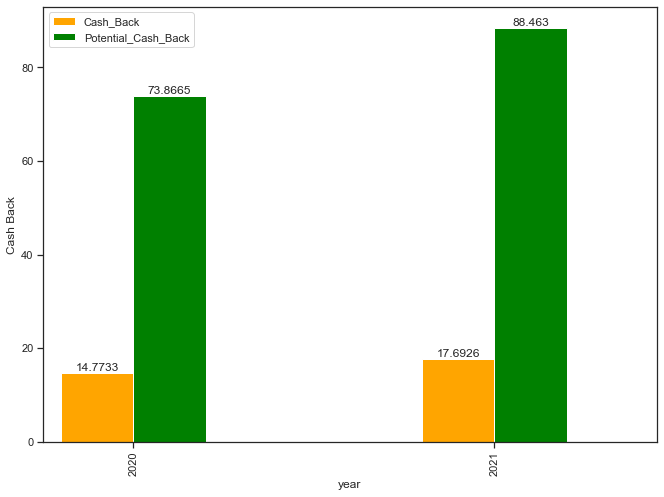

In [25]:
#plot potential savings

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Cash Back')

width=0.2



lowes.groupby('year')['Cash_Back'].sum().plot.bar(color='orange', ax=ax1,width=width,position=1)
lowes.groupby('year')['Potential_Cash_Back'].sum().plot.bar(color='green', ax=ax1,width=width,position=0)
plt.legend()

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.show()

Client could have saved 130 bucks over the past 2 years by switching Lowes spending to a Lowes card and shopping exclusively at Lowes vs Home Depot. Savings is approx 5.50 a month

# Grocery, Entertainment Analysis

Examine savings Client can obtain with a higher reward card for groceries. entertainment, and dining. Currently getting 1 percent back on groceries, 1 percent on entertainment. Capitol One Venture One offers 3 percent back on all of those categories and comes with no annual fee (client paying annual fee on current card -approx 100 dollars). 

In [26]:
#segment Grocery and Entertainment transactions and add a new column with expected cash back
cats = ['Groceries', 'Entertainment']

groc_ent_hist = history[history['Category'].isin(cats)].reset_index()

groc_ent_hist['Potential_Cash_Back'] = groc_ent_hist['charge_amt'] * .03

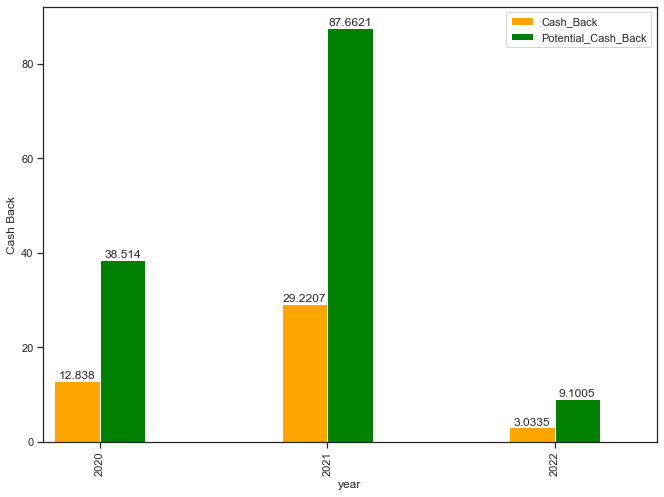

In [27]:
#plot potential savings

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Cash Back')

width=0.2



groc_ent_hist.groupby('year')['Cash_Back'].sum().plot.bar(color='orange', ax=ax1,width=width,position=1)
groc_ent_hist.groupby('year')['Potential_Cash_Back'].sum().plot.bar(color='green', ax=ax1,width=width,position=0)
plt.legend()

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.show()

Client could have saved 90 dollars over the past 2 years with switch to the Cap One. Savings of approx 3.75 a month

# Dining Analysis

Client currently getting 3 percent back on food & dining w/ 100 dollar annual fee. Explore savings for switching to AMEX Gold Card with an annual fee
of 250. Chase Sapphire Reserve offers 5 percent back on Dining with 550 dollar annual fee

In [29]:
cats = ['Food & Drink']

food_hist = history[history['Category'].isin(cats)].reset_index()

food_hist['Potential_Cash_Back_AMEX'] = food_hist['charge_amt'] * .04

food_hist['Potential_Cash_Back_Reserve'] = food_hist['charge_amt'] * .05

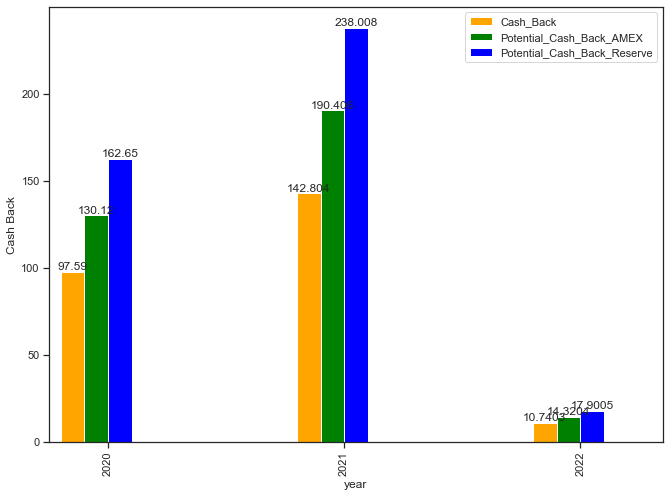

In [30]:
#plot potential savings

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Cash Back')

width=0.1



food_hist.groupby('year')['Cash_Back'].sum().plot.bar(color='orange', ax=ax1,width=width,position=2)
food_hist.groupby('year')['Potential_Cash_Back_AMEX'].sum().plot.bar(color='green', ax=ax1,width=width,position=1)
food_hist.groupby('year')['Potential_Cash_Back_Reserve'].sum().plot.bar(color='blue', ax=ax1,width=width,position=0)
plt.legend()

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])
plt.show()

Based on the graph above, it doesnt make sense for client to switch cards for food/dinning. Annual fees of other cards outweight benefit.
However, based on this chart, client may want to reconsider payinng annual fee for their current card and switching to the Cap One card noted above.
Current annual fee of 100 dollars may not be enough justify increased rewards for food and dining, Cap One card offers 1 percent back on food & dining

# Summary

Client can save approx 150-200 dollars a year by switching to a Lowes Credit Card and shopping exclusively at Lowes (instead of Home Depot) and switching from current card to Capital One Venture One card for all other charges